<a href="https://colab.research.google.com/github/FelipePinheiro964/Fase-1---estat-stica-aplicada/blob/main/Fase_1_Projeto_estatistica_aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar bibliotecas


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Ler arquivo e exibir para definir dados de cada tabela

tabela: 


,id,name,full_name,overall_rating,value_euro,wage_euro,nationality,national_team,club_team,age,...,crossing,finishing,heading_accuracy,short_passing,dribbling,jumping,strength,long_shots,aggression,GK_reflexes
0,158023,Messi,Lionel Andrés Messi Cuccittini,94,110500000,565000,Argentina,Argentina,FC Barcelona,31,...,86,95,70,92,97,68,66,94,48,8
1,153079,Aguero,Sergio Leonel Agüero del Castillo,89,64500000,300000,Argentina,Argentina,Manchester City,30,...,70,93,77,81,89,81,73,83,65,14
2,211110,Dybala,Paulo Bruno Exequiel Dybala,89,89000000,205000,Argentina,Argentina,Juventus,25,...,82,84,68,87,92,75,65,88,48,8
3,201399,Icardi,Mauro Emanuel Icardi Rivero,87,64500000,130000,Argentina,Argentina,Inter,26,...,46,91,91,73,77,94,76,70,56,9
4,226226,Lo Celso,Giovani Lo Celso,82,30000000,83000,Argentina,Argentina,Real Betis,22,...,75,77,59,82,84,64,69,76,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,186130,Chester,James Chester,74,4400000,18000,Wales,Wales,Aston Villa,30,...,54,33,73,68,60,84,78,31,72,13
714,170084,Hennessey,Wayne Hennessey,75,4000000,34000,Wales,Wales,Crystal Palace,32,...,11,12,14,29,8,41,68,10,21,71
715,184716,Allen,Joe Allen,76,7500000,44000,Wales,Wales,Stoke City,28,...,73,68,52,77,74,81,60,58,81,8
716,205923,Davies,Ben Davies,80,15000000,82000,Wales,Wales,Tottenham Hotspur,25,...,82,58,67,79,76,73,69,52,76,14


,count
club_team,
Juventus,14
FC Bayern Munchen,14
Tottenham Hotspur,14
Celtic,12
Manchester United,12
...,...
Panathinaikos FC,1
Real Sociedad,1
Real Sporting de Gijon,1



-----------------



,count
international_reputation(1-5),
1,402
2,183
3,104
4,24
5,5


,overall_rating,age,value_euro,wage_euro,dribbling
Média,76.46,26.57,13897694.99,49559.89,64.40
Mediana,76.00,26.00,8000000.00,27000.00,70.00
Moda,74.00,26.00,6500000.00,1000.00,76.00
Desvio Padrão,6.02,3.59,16917513.81,65224.91,20.63
minimo,58.00,18.00,230000.00,1000.00,7.00
maximo,94.00,37.00,110500000.00,565000.00,97.00
25%,72.00,24.00,3325000.00,10000.00,60.25
50%,76.00,26.00,8000000.00,27000.00,70.00
75%,80.00,29.00,17000000.00,59000.00,77.00


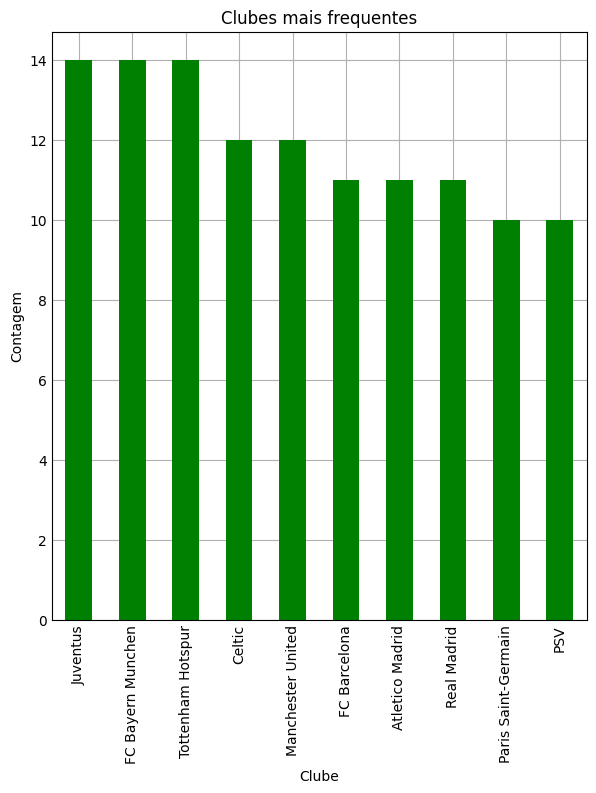

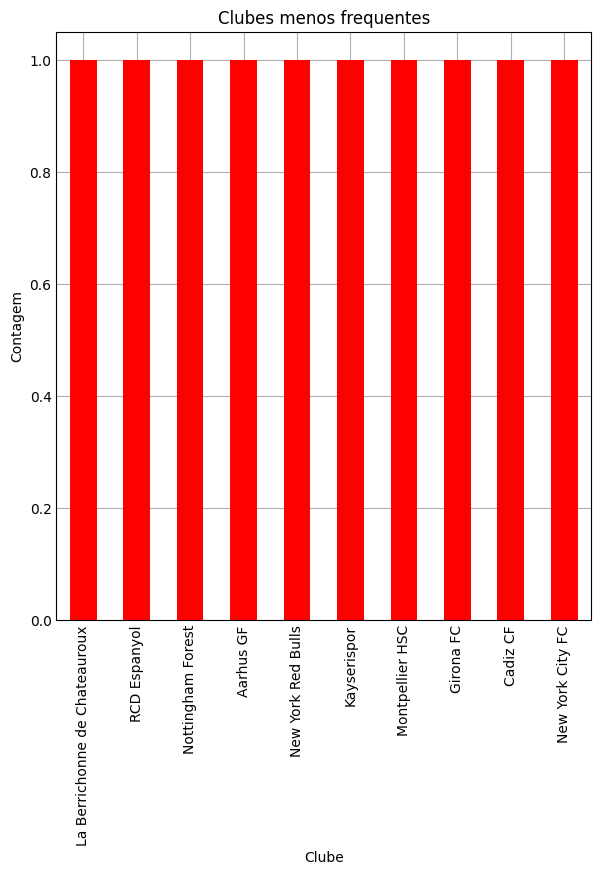

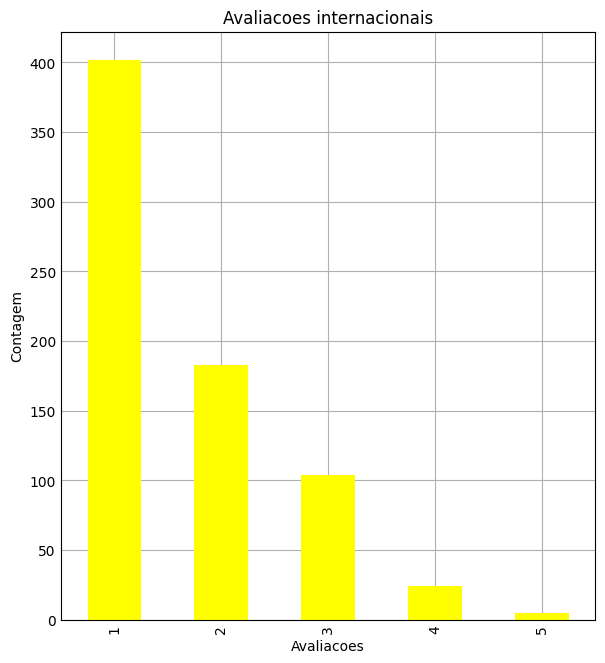

In [111]:
def carregar_dados_iniciais():
    f = "fifa.csv"
    dados_fifa = pd.read_csv(f, sep=",")

    return dados_fifa

def exibir_tabela(dados_fifa):
    # pd.set_option('display.max.rows', None)
    print("tabela: ")
    display(dados_fifa)

def main():
    # dados_fifa = carregar_dados_iniciais()
    # exibir_tabela(dados_fifa)
    # questao_2(dados_fifa)
    # questao_3(dados_fifa)
    # bar_grafic()
    # boxplot()
    # hist()

main()

Função de grafico de barras


# 2. Tabelas de frequência para duas variáveis qualitativas


Para a segunda questão, fiz uma funçao lendo duas colunas:

- Club_team: Qualitativa nominal
- Internacional_reputation(1-5): Qualitativa nominal

Com ajuda do pandas, fiz a contagem de frequencia de cada item presente nas colunas, colocando numa variavel. Para auxiliar a visualização, fiz 3 graficos, onde 2 deles sao da tabela Club_team, e uma da internacional_reputation.

In [96]:
# Criando uma função
def questao_2(dados_fifa):
  # Criando uma contagem de vezes que cada time aparece dentro do arquivo
  club_counts = dados_fifa['club_team'].value_counts()
  display(club_counts)
  # Contagem de avaliacoes internacionais de jogadores
  print()
  print("-----------------")
  print()
  inter_reputation_count = dados_fifa['international_reputation(1-5)'].value_counts()
  display(inter_reputation_count)

  # grafico de barra para melhor visualização
  # separando entre os 10 maiores e menores para os clubes, para melhor visualização
  top_clubs = club_counts.nlargest(10)
  bottom_clubs = club_counts.nsmallest(10)
  inter_reputation_count = inter_reputation_count.nlargest(5)

  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  top_clubs.plot(kind="bar", color="green")
  plt.title("Clubes mais frequentes")
  plt.xlabel("Clube")
  plt.ylabel("Contagem")
  plt.xticks(rotation=90)

  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,2)
  bottom_clubs.plot(kind="bar", color="red")
  plt.title("Clubes menos frequentes")
  plt.xlabel("Clube")
  plt.ylabel("Contagem")
  plt.xticks(rotation=90)

  plt.figure(figsize=(12, 6))
  plt.subplot(1,2,1)
  inter_reputation_count.plot(kind="bar", color="yellow")
  plt.title("Avaliacoes internacionais")
  plt.xlabel("Avaliacoes")
  plt.ylabel("Contagem")
  plt.xticks(rotation=90)

# 3. Uma tabela com medidas de posição e variabilidade para ao menos 5 variáveis a serem escolhidas;

In [109]:
def questao_3(dados_fifa):

  # definindo variaveis
  variaveis = ['overall_rating', 'age', 'value_euro', 'wage_euro', 'dribbling' ]
  selected_data = dados_fifa[variaveis]

  # medidas de posição
  medidas = {
      'Média': selected_data.mean().round(2),
      'Mediana': selected_data.median().round(2),
      'Moda': selected_data.mode().iloc[0].round(2),
      'Desvio Padrão': selected_data.std().round(2),
      'minimo': selected_data.min().round(2),
      'maximo': selected_data.max().round(2),
      '25%': selected_data.quantile(0.25).round(2),
      '50%': selected_data.quantile(0.50).round(2),
      '75%': selected_data.quantile(0.75).round(2)
  }

  # cria um dataframe para organizar os resultados
  medidas_df = pd.DataFrame(medidas)

  # melhora visualizaçao
  medidas_df = medidas_df.transpose()

  # evita notaçao cientifica na tabela
  medidas_df = medidas_df.map(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

  # mostra a tabela
  display(medidas_df)
